In [2]:
import pandas as pd

In [3]:
db_housing = pd.read_csv("Housing.csv")

In [4]:
db_housing.size

118260

In [8]:
db_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
db_housing.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


In [11]:
#Columnas númericas 38, de categoría 43

In [13]:
db_housing.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [55]:
print ('Column\t\t%')
for col in db_housing:
    promedio = (int(db_housing[col].isnull().sum())/(int(db_housing[col].count())+int(db_housing[col].isnull().sum())))*100.0          
    if (promedio > 50.0):
        print (col+'\t\t'+str(round(promedio))+'%')

Column		%
Alley		94%
PoolQC		100%
Fence		81%
MiscFeature		96%


In [58]:
print ('Column\t\tFaltantes')
for col in db_housing:
    if (db_housing[col].dtype == 'object'):
        print (col+'\t\t'+str(db_housing[col].isnull().sum()))          

Column		Faltantes
MSZoning		0
Street		0
Alley		1369
LotShape		0
LandContour		0
Utilities		0
LotConfig		0
LandSlope		0
Neighborhood		0
Condition1		0
Condition2		0
BldgType		0
HouseStyle		0
RoofStyle		0
RoofMatl		0
Exterior1st		0
Exterior2nd		0
MasVnrType		8
ExterQual		0
ExterCond		0
Foundation		0
BsmtQual		37
BsmtCond		37
BsmtExposure		38
BsmtFinType1		37
BsmtFinType2		38
Heating		0
HeatingQC		0
CentralAir		0
Electrical		1
KitchenQual		0
Functional		0
FireplaceQu		690
GarageType		81
GarageFinish		81
GarageQual		81
GarageCond		81
PavedDrive		0
PoolQC		1453
Fence		1179
MiscFeature		1406
SaleType		0
SaleCondition		0


In [62]:
statistics.median(db_housing['YrSold'])

2008.0

In [60]:
import statistics

In [63]:
db_housing['YrSold'].fillna(statistics.median(db_housing['YrSold']))

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008
Name: YrSold, Length: 1460, dtype: int64

In [64]:
db_housing['LotFrontage'].fillna(statistics.mean(db_housing['LotFrontage']))

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [67]:
pd.get_dummies(db_housing['SaleCondition'], prefix='')

,_Abnorml,_AdjLand,_Alloca,_Family,_Normal,_Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1455,0,0,0,0,1,0
1456,0,0,0,0,1,0
1457,0,0,0,0,1,0
1458,0,0,0,0,1,0


In [10]:
def sumaBATHs(bfull,bhalf,full,half):
    return bfull+full+(0.5*(bhalf+half))

In [11]:
db_housing.assign(TotalBath  = lambda x: sumaBATHs(x['BsmtFullBath'], x['BsmtHalfBath'], x['FullBath'], x['HalfBath']))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBath
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,3.5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2.5
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,3.5
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,2.5
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,3.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,2.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,2.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028E2E2A1BB0>]],
      dtype=object)

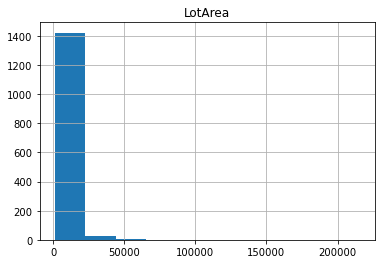

In [14]:
db_housing.hist(column='LotArea')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028E2EA26040>]],
      dtype=object)

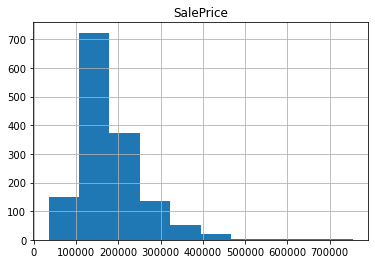

In [15]:
db_housing.hist(column='SalePrice')

In [16]:
db_housing.drop('Id', inplace=True, axis=1)

In [17]:
db_housing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
